## Paper example: How I recognise speech

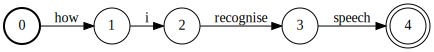

In [9]:
import fst

syms = fst.SymbolTable()

transcript = fst.linear_chain("how i recognise speech".split(), syms)
transcript

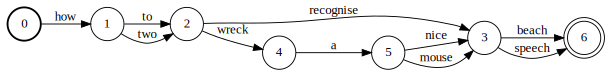

In [10]:
decode = fst.Transducer(isyms=syms, osyms=syms)
decode.add_arc(0, 1, 'how', 'how')
decode.add_arc(1, 2, 'to', 'to')
decode.add_arc(1, 2, 'two', 'two')
decode.add_arc(2, 3, 'recognise', 'recognise')
decode.add_arc(2, 4, 'wreck', 'wreck')
decode.add_arc(4, 5, 'a', 'a')
decode.add_arc(5, 3, 'nice', 'nice')
decode.add_arc(5, 3, 'mouse', 'mouse')
decode.add_arc(3, 6, 'beach', 'beach')
decode.add_arc(3, 6, 'speech', 'speech')
decode[6].final = True

decode

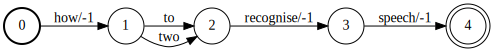

In [11]:
edit_transducer = fst.Transducer(isyms=syms, osyms=syms)

for (w1, _) in list(syms.items())[1:]:
    # cost = 0 for insertions and deletions
    edit_transducer.add_arc(0, 0, w1, 'ε', 0)
    edit_transducer.add_arc(0, 0, 'ε', w1, 0)
    
    for (w2, _) in list(syms.items())[1:]:
        # cost = -1 for matches, 0 otherwise
        edit_transducer.add_arc(0, 0, w1, w2, -1 * (w1 == w2))

edit_transducer[0].final = True

transcript.arc_sort_output()
decode.arc_sort_input()

result = transcript.compose(edit_transducer).compose(decode)
result.prune(0)
result.project_output()
result.remove_epsilon()
result = result.determinize()

result